#### 1. IMPORT LIBRERIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

#### 2. IMPORT CSV

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### 3. DELETE COLUMNS

In [5]:
df = df.drop(['HouseAge', 'AveRooms','AveBedrms', 'Population','AveOccup', 'MedHouseVal'], axis=1)

In [6]:
df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


#### 4. DIVISION TRAIN/TEST

In [7]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


#### 5. TRAIN XTRAIN

In [9]:
from sklearn.cluster import KMeans

num_clusters = 6
model = KMeans(n_clusters=num_clusters, random_state=42)
model.fit(X_train)

c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

#### 6. PREDICT CLUSTER IN DATA PROOF

In [10]:
y_test_pred = model.predict(X_test)
X_test_with_cluster = X_test.copy()

#### 7. ADD A CLUSTER COLUMNS IN TRAIN AND TEST

In [11]:
y_train = list(model.labels_)
X_train["Cluster"] = y_train

X_test_with_cluster["Cluster"] = y_test_pred


#### 8. PLOT

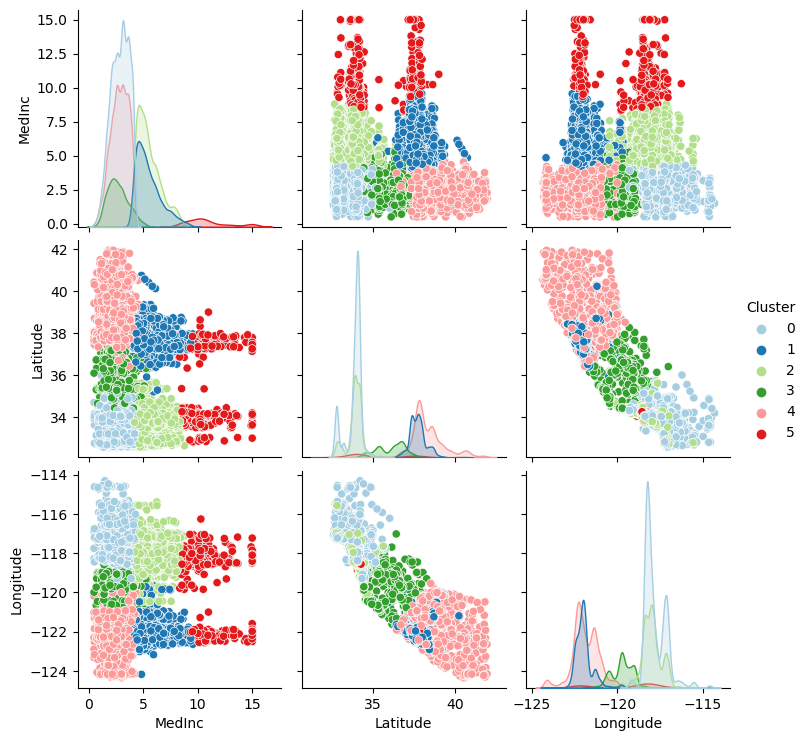

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=X_train, hue='Cluster', palette='Paired')
plt.show()

#### 9. METRICS.

In [13]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calcular las métricas
silhouette = silhouette_score(X_test, y_test_pred)
calinski = calinski_harabasz_score(X_test, y_test_pred)
davies_bouldin = davies_bouldin_score(X_test, y_test_pred)

print("Índice de Silueta:", silhouette)
print("Calinski-Harabasz Index:", calinski)
print("Davies-Bouldin Index:", davies_bouldin)




Índice de Silueta: 0.39982722427129436
Calinski-Harabasz Index: 4554.479908598292
Davies-Bouldin Index: 0.8362690711716988


In [15]:
import joblib

model_filename = "modelo_clustering.joblib"
joblib.dump(model, model_filename)

['modelo_clustering.joblib']

#### 10. INTERESTING DATA 

* Clustering

In [14]:
from IPython.display import HTML

pdf_link = "https://disi.unal.edu.co/~eleonguz/cursos/mda/presentaciones/validacion_Clustering.pdf"


button_html = f'<a href="{pdf_link}" target="_blank"><button style="padding: 10px; background-color: #4CAF50; color: white; border: none; cursor: pointer;">Accede al contenido</button></a>'


display(HTML(button_html))

* joblib

In [16]:


from IPython.display import HTML

pdf_link = "http://exponentis.es/persistencia-de-modelos-en-python-como-guardar-tu-modelo-entrenado-de-machine-learning"


button_html = f'<a href="{pdf_link}" target="_blank"><button style="padding: 10px; background-color: #4CAF50; color: white; border: none; cursor: pointer;">Accede al contenido</button></a>'


display(HTML(button_html))